# Aprendizaje Computacional  

## Mario Graff (mgraffg@ieee.org, mario.graff@infotec.mx)  
## [https://github.com/ingeotec](https://github.com/ingeotec)
## [https://github.com/mgraffg](https://github.com/mgraffg)
## CONACYT - INFOTEC

# Temas  

1. Introducción  
2. Aprendizaje supervisado  
3. Métodos paramétricos  
4. Métodos no-paramétricos  
5. Máquinas de kernel  
6. Métodos no convencionales de aprendizaje  
7. Diseño y análisis de experimentos de aprendizaje  
8. Aplicaciones

# Centroide mas Cercano  - __Nearest Centroid__

* $C = \text{argmin}_{j \in \mathcal C} d(\mathbf j, \mathbf x)$
* $\mathcal C$ - conjunto de centros

* $\mathbf x \in \mathbb R^d$
* $\mathbf j \in \mathbb R^d$ donde $j \in \mathcal C$

# Construir $\mathcal C$

* ¿Cuántos elementos tiene?

* Al menos el número de clases
* ¿Cómo seleccionarlos?

* Promedio por dimensión

* $D_1 = \{ (x, r) \mid (x, r) \in \mathcal X, r=1 \}$
* $\mathbf c \in \mathcal C$ 
* $\mathbf c$ centroide de la clase 1

* $\mathbf c_i = \frac{\sum_{(\mathbf x, r) \in D_1} \mathbf x_i}{\mid D_1 \mid}$

* $d$ es cualquier distancia

In [1]:
%pylab inline
import numpy as np
def boundary(x, y, m):
    px = []
    py = []
    for y0 in y:
        pr = m.predict(np.vstack((x, [y0] * x.shape[0])).T)
        df = np.fabs(pr[1:] - pr[:-1])
        step = np.where(df > 0)[0]
        if len(step):
            for x0 in step:
                py.append(y0)
                px.append(x[x0])
    return px, py

Populating the interactive namespace from numpy and matplotlib


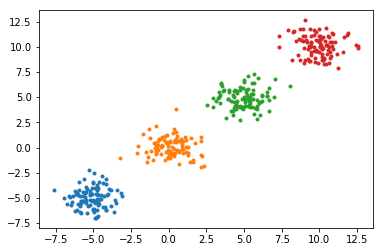

In [2]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestCentroid
centers = [(-5, -5), (0, 0), (5, 5), (10, 10)]
X, y = make_blobs(n_samples=400, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

# pylab.legend(['Clase 1', 'Clase 2', 'Clase 3'])


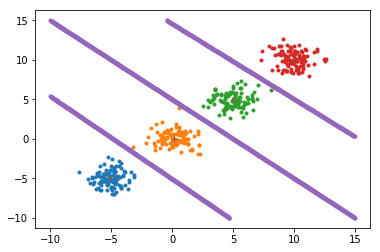

In [3]:
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
m = NearestCentroid().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
pylab.plot([x[0] for x in m.centroids_], [x[1] for x in m.centroids_], '+')

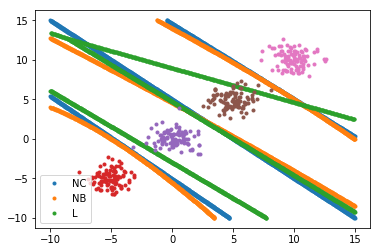

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
m = NearestCentroid().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
m = GaussianNB().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
m = LogisticRegression().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
pylab.legend(['NC', 'NB', 'L'])
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

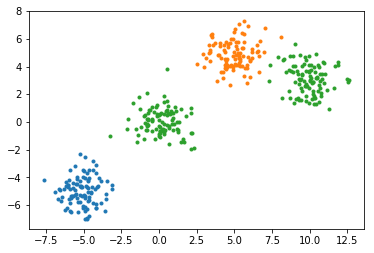

In [5]:
centers = [(-5, -5), (0, 0), (5, 5), (10, 3)]
X, y = make_blobs(n_samples=400, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
y[100:200] = 3
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

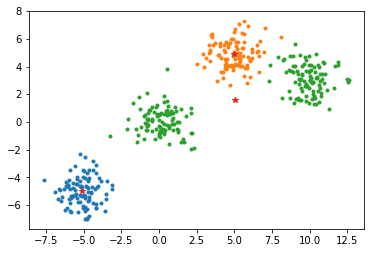

In [6]:
m = NearestCentroid().fit(X, y)
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
pylab.plot([x[0] for x in m.centroids_], [x[1] for x in m.centroids_], '*')

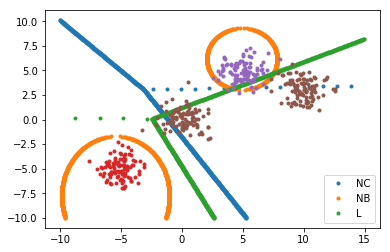

In [7]:
m = NearestCentroid().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
m = GaussianNB().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
m = LogisticRegression().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
pylab.legend(['NC', 'NB', 'L'])
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

# Vecinos Cercanos - _K Nearest Neighbors_

* Es un método flojo - _lazy_
* Usar $\mathcal X$ directamente para clasificar

* Dado un ejemplo sin clasificar $\mathbf w$
* Ver la clase de los K-vecinos a $\mathbf w$ de $\mathcal X$
* Seleccionar la clase en base a sus vecinos

# 1 Vecino Cercano

* $C = \text{argmin}_{(\mathbf j, r) \in \mathcal X} d(\mathbf j, \mathbf x)$

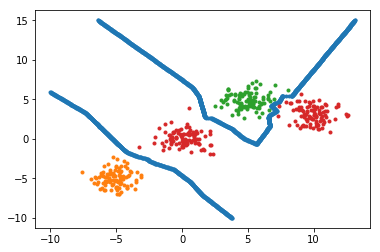

In [8]:
from sklearn.neighbors import KNeighborsClassifier
m = KNeighborsClassifier(n_neighbors=1).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

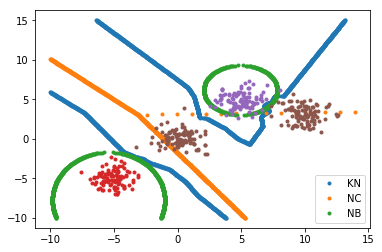

In [9]:
m = KNeighborsClassifier(n_neighbors=1).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
m = NearestCentroid().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
m = GaussianNB().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
pylab.legend(['KN', 'NC', 'NB'])
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

# $K$-Vecinos

* Seleccionar los $K$ vecinos a la consulta $\mathbf w$
* $D = \pi_{\mathbf w}(\mathcal X)$
* $\pi_{\mathbf w} (\mathcal X) = ((\mathbf x_i, r_i) \mid (\mathbf x_i, r_i) \in \mathcal X,  d(\mathbf x_i, \mathbf w) \leq d(\mathbf x_{i+1}, \mathbf w), i=1,\ldots,\mid \mathcal X \mid )$
* K-Vecinos son:

* $N = \{(\mathbf x_i, r_i) \mid (\mathbf x_i, r_i) \in \pi_{\mathbf w} (\mathcal X), i=1, \ldots, K \}$

* $N_c = \{ (\mathbf x, r) | (\mathbf x, r) \in N, r=c \}$
* $C = \text{argmax}_c \mid N_c \mid$

# $K=1$

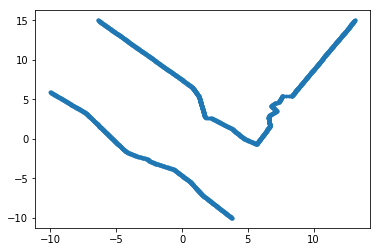

In [10]:
m = KNeighborsClassifier(n_neighbors=1).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')

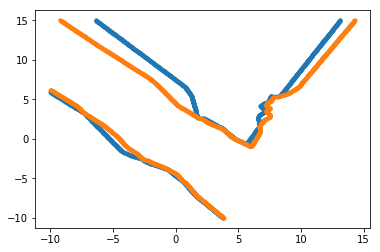

In [11]:
m = KNeighborsClassifier(n_neighbors=1).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')

m = KNeighborsClassifier(n_neighbors=2).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')

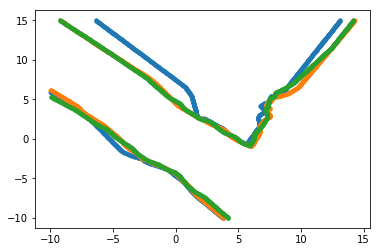

In [12]:
m = KNeighborsClassifier(n_neighbors=1).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')

m = KNeighborsClassifier(n_neighbors=2).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')

m = KNeighborsClassifier(n_neighbors=4).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')

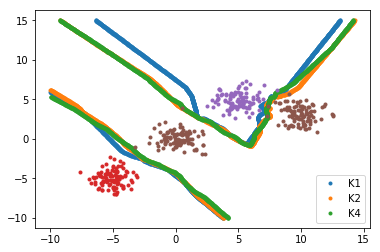

In [13]:
m = KNeighborsClassifier(n_neighbors=1).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')

m = KNeighborsClassifier(n_neighbors=2).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')

m = KNeighborsClassifier(n_neighbors=4).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')

pylab.legend(['K1', 'K2', 'K4'])
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

# Árboles de Decisión

* Árbol - una esctructura de datos
* Divide y venceras

* Las hojas indican la clase
* Los nodos implementan una función discriminante $f_m$

* El árbol se camina de la raíz a las hojas
* $f_m$ indica el camino 

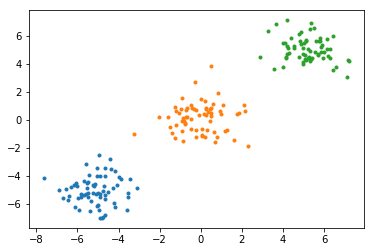

In [14]:
from sklearn import tree
import graphviz 
import numpy as np
from sklearn.datasets import make_blobs
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

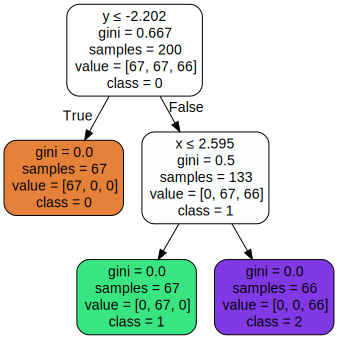

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['x', 'y'],  
                                class_names=[str(x) for x in np.unique(y)],  
                             filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 
graph

# Construcción

* $f_m(\mathbf x) = \mathbf x_i \leq w$
* En caso de $x_i$ sea discreto entonces $f_m$ es un switch
* ¿Cómo hacer la partición?

* Medir el rendimiento
* _impurity_

* Conocer - $P(C_i \mid \mathcal X, m)$

* Sea $N_m \subseteq \mathcal X$
* $N_m$ son los elementos de $\mathcal X$ en el nodo $m$
* $N_m^i = \mid \{ (\mathcal X, r) \in N_m \mid r=i \} \mid$
* $P(C_i \mid \mathcal X, m) = p_m^i =\frac{N_m^i}{N_m}$

# _Impurity_
* $p_m^i = \frac{N_m^i}{N_m}$
* Una medida podría ser la entropia
* $\mathcal I_m = - \sum_i p_m^i \log_2 p_m^i$
* $0 \log_2 0 = 0$

# Dividir
* Encontrar $i$ y $w$ de  
  $f_m(\mathbf x) = \mathbf x_i \leq w$

* Minimizando _Impurity_
* ¿Cómo?

* Medir el rendimiento en los hijos, $j$, seleccionando $i$ y $w$

* $P(C_i \mid \mathcal X, m, j)$

* $j$ se refiere al hijo del nodo $m$

* Sea $N_{mj}^i$ son los elementos del nodo $m$ en hijo $j$ 

* $p_{mj}^i = \frac{N_{mj}^i}{N_{mj}}$
* $\mathcal I^\prime = -\sum_j \frac{N_{mj}}{N_m} \sum_i p_{mj}^i \log_2 p_{mj}^i$

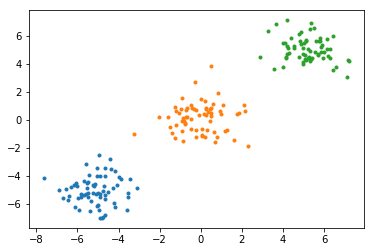

In [16]:
from sklearn import tree
import graphviz 
import numpy as np
from sklearn.datasets import make_blobs
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

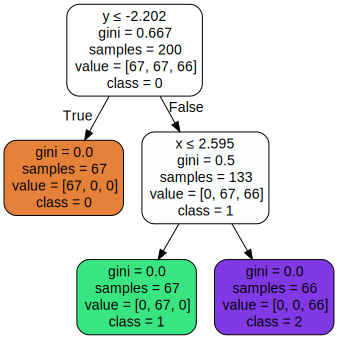

In [17]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['x', 'y'],  
                                class_names=[str(x) for x in np.unique(y)],  
                             filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 
graph

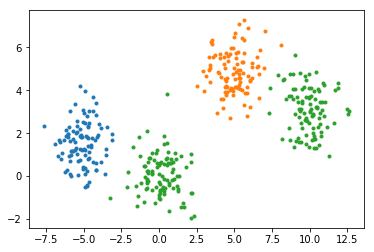

In [22]:
centers = [(-5, 1.5), (0, 0), (5, 5), (10, 3)]
X, y = make_blobs(n_samples=400, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
y[100:200] = 3
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

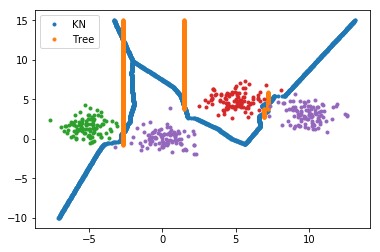

In [23]:
m = KNeighborsClassifier(n_neighbors=1).fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
m = tree.DecisionTreeClassifier().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
pylab.legend(['KN', 'Tree'])
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

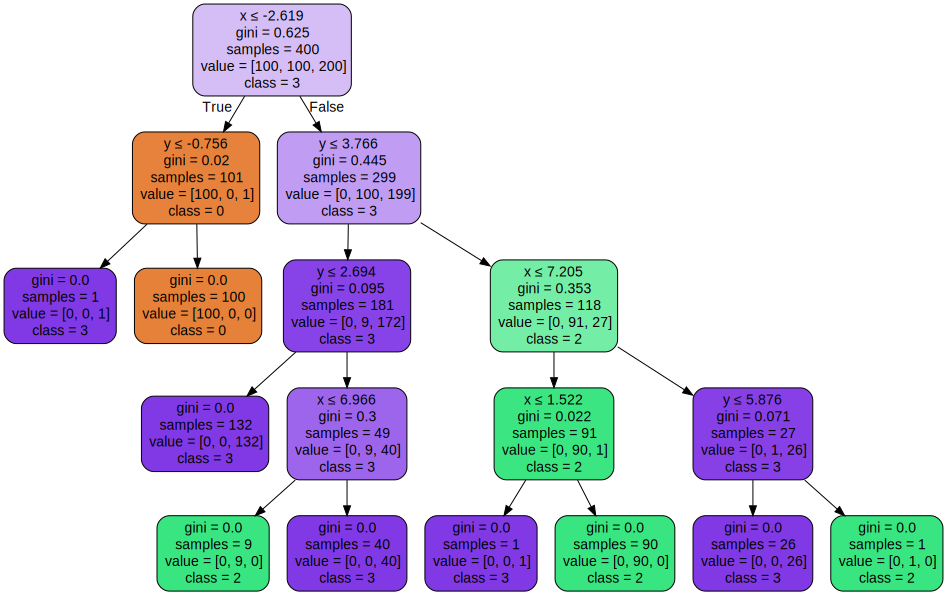

In [26]:
dot_data = tree.export_graphviz(m, out_file=None, 
                                feature_names=['x', 'y'],  
                                class_names=[str(x) for x in np.unique(y)],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data) 
graph

# Comentarios finales

* ¿Cuál es la complejidad de Vecinos Cercanos?
* Como seleccionarían $w$ dado un $i$  
  $f_m(\mathbf x) = \mathbf x_i \leq w$